# Explore here

In [628]:
import pandas as pd
import requests
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

from sklearn.feature_selection import mutual_info_regression, SelectKBest

from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

url = "https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv"
df = pd.read_csv(url)
df.to_csv("../data/raw/data.csv", index=False)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


En el data set podemos observar un registro de 768 pacientes, 9 caracteristicas relevantes para la prediccion. Los datos estan en int64 y float64. 
Por otro lado, podemos ver que hay variables importantes, como *pregnancies*, *glucose*, *bloodpressure*, *bmi*.
Variable objetivo: *Outcome* donde 0: no tiene diabetes, 1: si tiene diabetes.

In [629]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [630]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Podemos ver que en el Dataset no hay valores nulos. 

In [631]:
df[df["Glucose"]== 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [632]:
df[df["BloodPressure"] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
172,2,87,0,23,0,28.9,0.773,25,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1


In [633]:
columns = ["Glucose", "BloodPressure", "Age", "BMI", "DiabetesPedigreeFunction", "SkinThickness"]

for col in columns:
    df[col] = df[col].replace(1, df[col].median())

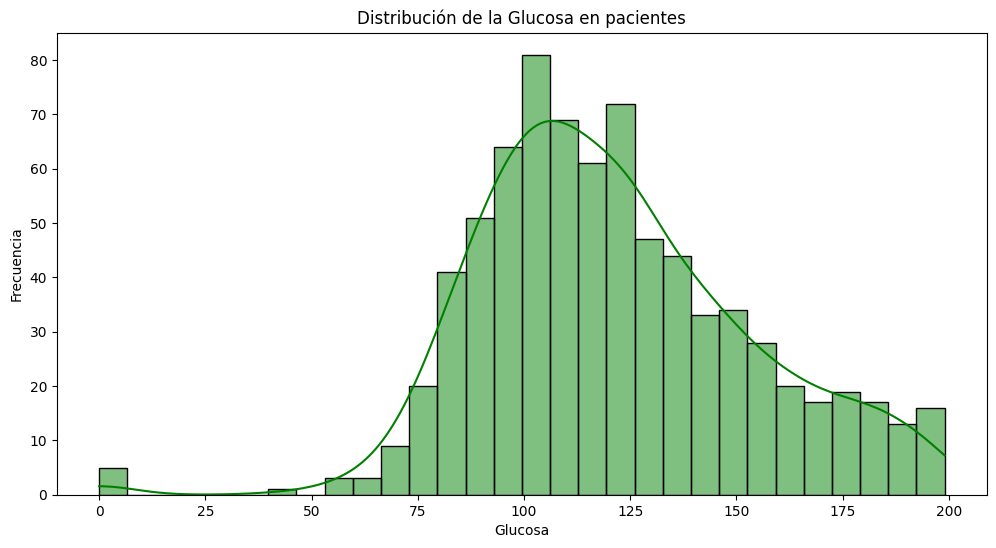

In [634]:
#Distribucion con la variable objetivo
plt.figure(figsize=(12, 6))
sns.histplot(df['Glucose'], bins=30, kde=True, color='green')
plt.title('Distribución de la Glucosa en pacientes')
plt.xlabel('Glucosa')
plt.ylabel('Frecuencia')
plt.show()

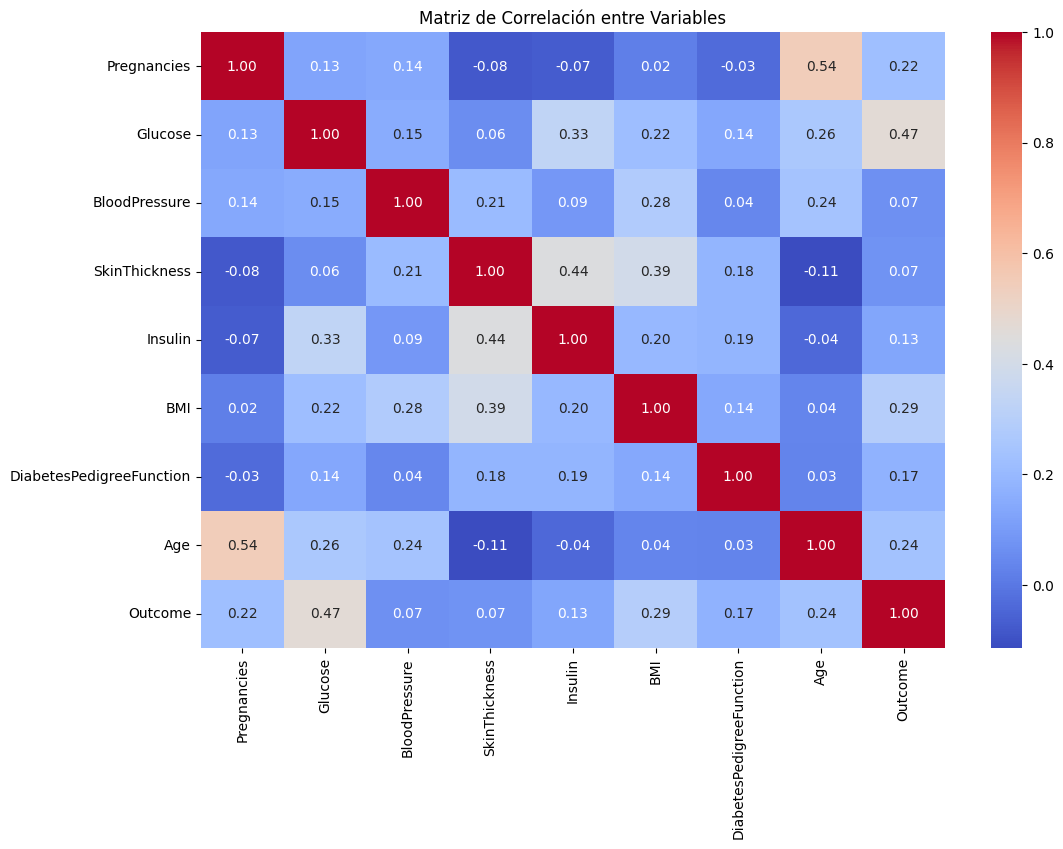

In [635]:
#Matriz de correlacion
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Matriz de Correlación entre Variables")
plt.show()

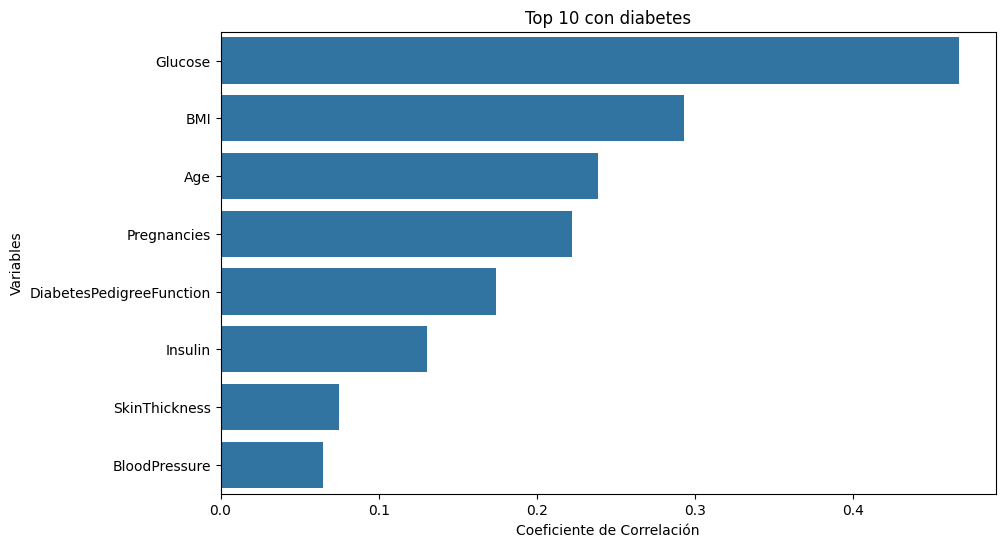

In [636]:
corr = df.corr(numeric_only=True)
corr_diabetes = corr["Outcome"].drop("Outcome").sort_values(ascending=False).head(8)
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_diabetes.values, y=corr_diabetes.index, legend=False)
plt.xlabel("Coeficiente de Correlación")
plt.ylabel("Variables")
plt.title("Top 10 con diabetes")
plt.show()

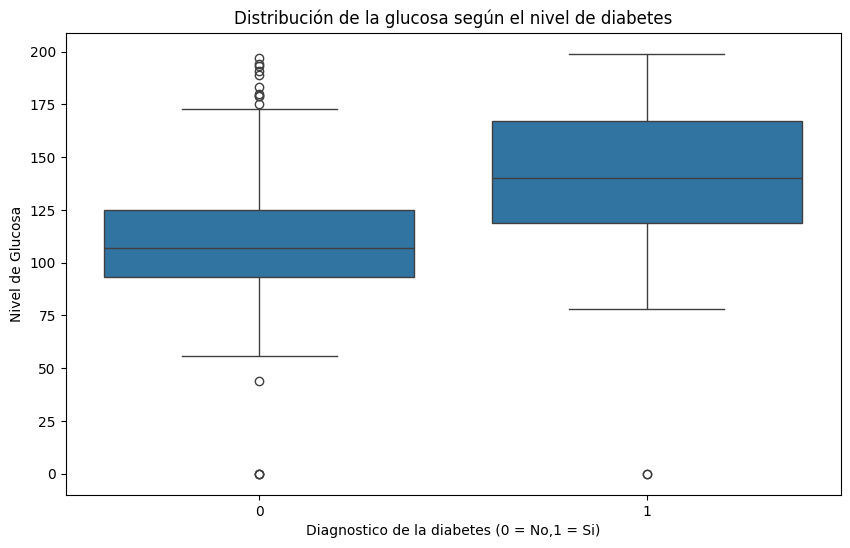

In [637]:
# Impacto de la glucosa con la diabetes
plt.figure(figsize=(10, 6))
sns.boxplot(x="Outcome", y="Glucose", data=df)
plt.title("Distribución de la glucosa según el nivel de diabetes")
plt.xlabel("Diagnostico de la diabetes (0 = No,1 = Si)")
plt.ylabel("Nivel de Glucosa")
plt.show()

La glucosa esta fuertemente relacionada con la diabetes.

In [638]:

# Definir características (X) y variable objetivo (y)
X = df.drop(columns=["Outcome"])
y = df["Outcome"] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [639]:
#Modelo
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

#Predicciones
y_pred_test = model.predict(X_test_scaled)
y_pred_train = model.predict(X_train_scaled)
accuracy_y = accuracy_score(y_test, y_pred_test)
print(f"Precisión del modelo: {accuracy_y:.2f}")


Precisión del modelo: 0.72


In [640]:
# Datos de los pacientes
Columns_df = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies']
nuevo_paciente_scaled= scaler.transform(nuevo_paciente_df)
# Predecir diagnóstico
prediccion = model.predict(nuevo_paciente_scaled)
resultado = "Tiene diabetes" if prediccion[0] == 0 else "No tiene diabetes"
print(f"Resultado de la predicción: {resultado}")


Resultado de la predicción: Tiene diabetes


In [641]:
# Árbol GINI
tree_gini = DecisionTreeClassifier(criterion="gini", random_state=42)
tree_gini.fit(X_train_scaled, y_train)

# Árbol ENTROPY
tree_entropy = DecisionTreeClassifier(criterion="entropy", random_state=42)
tree_entropy.fit(X_train_scaled, y_train)

# Predicciones
y_pred_gini = tree_gini.predict(X_test_scaled)
y_pred_entropy = tree_entropy.predict(X_test_scaled)

# Evaluación de precisión
acc_gini = accuracy_score(y_test, y_pred_gini)
acc_entropy = accuracy_score(y_test, y_pred_entropy)

print(f"Precisión con GINI: {acc_gini:.3f}")
print(f"Precisión con ENTROPY: {acc_entropy:.3f}")


Precisión con GINI: 0.721
Precisión con ENTROPY: 0.701


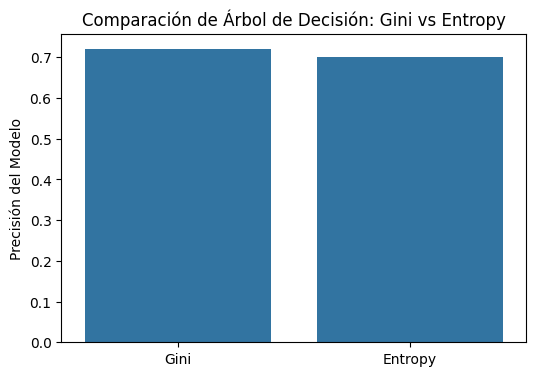

In [642]:
plt.figure(figsize=(6, 4))
sns.barplot(x=["Gini", "Entropy"], y=[acc_gini, acc_entropy])
plt.ylabel("Precisión del Modelo")
plt.title("Comparación de Árbol de Decisión: Gini vs Entropy")
plt.show()
